In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Step 1: Load dataset
# Load the data from column_2C_weka.csv file
data = pd.read_csv('column_2C_weka.csv')

In [3]:
# Map the target class to numerical values
data['class'] = data['class'].map({'Normal': 0, 'Abnormal': 1})

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [4]:
# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Mean Squared Error for Linear Regression: 0.1362046741333741


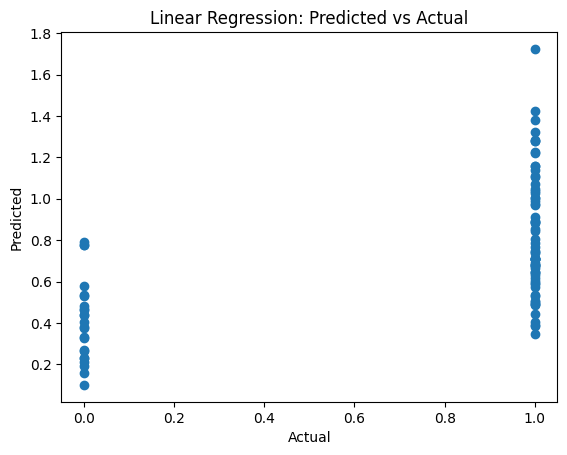

In [6]:
# Step 3: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lin)
print("Mean Squared Error for Linear Regression:", mse)

# Plot predicted vs actual for Linear Regression
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()


In [7]:
# Step 4: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log)
print("Accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_log))


Confusion Matrix for Logistic Regression:
 [[20  4]
 [ 5 64]]
Accuracy for Logistic Regression: 0.9032258064516129


Confusion Matrix for Decision Tree:
 [[18  6]
 [12 57]]
Accuracy for Decision Tree: 0.8064516129032258


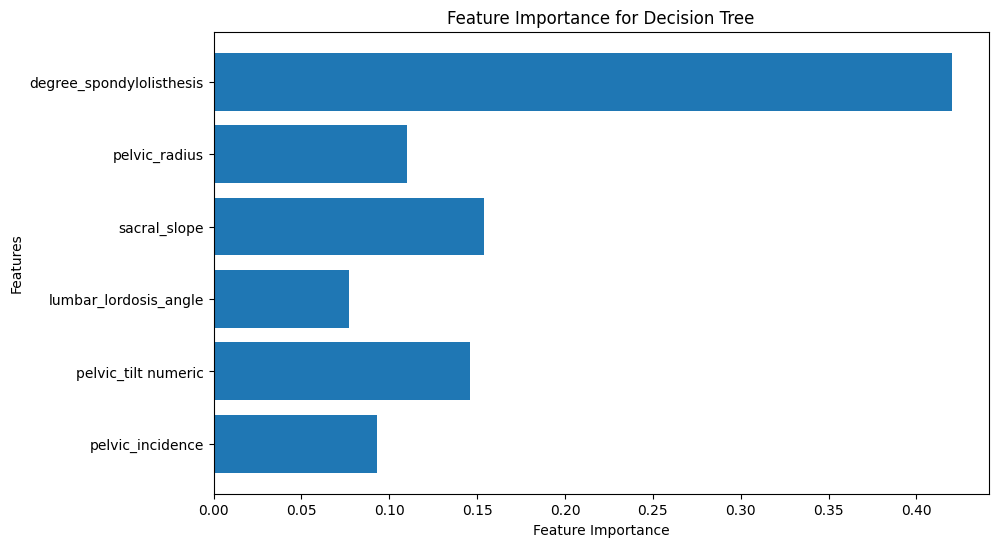

In [9]:
# Step 5: Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:\n", conf_matrix_tree)
print("Accuracy for Decision Tree:", accuracy_score(y_test, y_pred_tree))
# Feature importance plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(X.columns, tree_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Decision Tree")
plt.show()

In [10]:
# Step 6: Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)
print("Accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix for Random Forest:
 [[14 10]
 [ 5 64]]
Accuracy for Random Forest: 0.8387096774193549


Confusion Matrix for K-Nearest Neighbors:
 [[15  9]
 [11 58]]
Accuracy for K-Nearest Neighbors: 0.7849462365591398


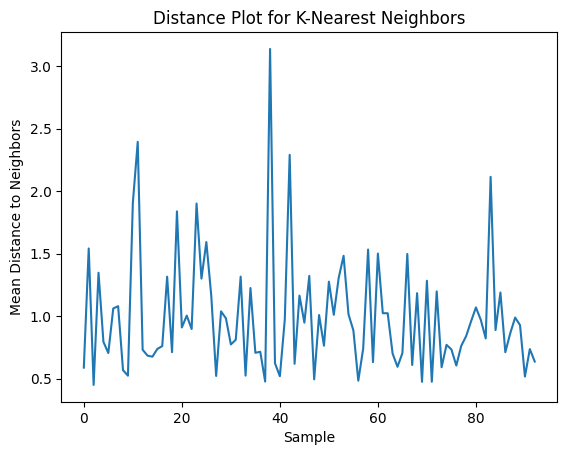

In [12]:
# Step 7: K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for K-Nearest Neighbors:\n", conf_matrix_knn)
print("Accuracy for K-Nearest Neighbors:", accuracy_score(y_test, y_pred_knn))
# Distance plot for K-Nearest Neighbors
distances, _ = knn.kneighbors(X_test)
plt.plot(distances.mean(axis=1))
plt.xlabel("Sample")
plt.ylabel("Mean Distance to Neighbors")
plt.title("Distance Plot for K-Nearest Neighbors")
plt.show()

In [13]:
# Step 8: Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", conf_matrix_svm)
print("Accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

Confusion Matrix for SVM:
 [[18  6]
 [ 7 62]]
Accuracy for SVM: 0.8602150537634409
